In [2]:
import pandas as pd
import seaborn as sns
import spacy
import re
from wordcloud import WordCloud
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split

In [2]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.

In [4]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.8 MB/s eta 0:00:00


In [3]:
import pandas as pd

file_path = 'Downloads/twitter_training.csv'
data = pd.read_csv(file_path, header=None)


data.columns = ['ID', 'game', 'label', 'text']


data.sample(5)

,ID,game,label,text
22798,4306,CS-GO,Positive,. keep up the great work of king
39847,1241,Battlefield,Irrelevant,Battlefield 4 player tatuaje _ fausto has been...
53879,2057,CallOfDuty,Irrelevant,Flip The Fuck My Cyklon30001189 just joined th...
8367,9435,Overwatch,Irrelevant,I am sick.. mad. This is why I hate playing yo...
19271,12500,WorldOfCraft,Positive,This amazing trailer that @Blizzard_Ent shows ...


In [4]:
cols_to_drop = ['ID','game']
data = data.drop(cols_to_drop,axis=1)
data.sample(5)

,label,text
30361,Positive,Amazing SYNERGY MOMENTS (Wombo Combo League of...
13773,Negative,Smh<unk> is NASTY
65934,Positive,Dividends Kings . . . Dividend Kings are compa...
44041,Irrelevant,I just know that jisoo is so happy to work wit...
22944,Negative,Hey @valvesoftware @Steam why is @CSGO lag bad...


In [5]:
data = data[~data['label'].isin(['Neutral', 'Irrelevant'])]

data.sample(5)

,label,text
27537,Positive,Assassins but also wild vikings. Im 100% sold
28755,Negative,@PlayApex AT doodoo bitch
12857,Negative,"fact Luka ain't on the cover and Zion sucked, ..."
4670,Negative,I'm really disappointed with amazon today! I o...
19459,Positive,"When I talk about World of Warcraft on AM, I l..."


In [6]:
data['label'] = data['label'].replace({'Positive': 1, 'Negative': 0})

<Axes: xlabel='label', ylabel='count'>

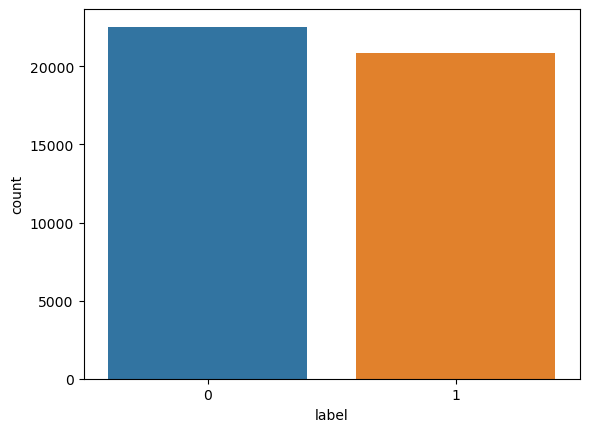

In [14]:
sns.countplot(x='label', data=data)

In [15]:
data['text'] = data['text'].str.lower()
data.sample(5)

,label,text
65205,0,rhandlerr rhandlerr rhandlerr rhandlerr rhandl...
52290,1,just completed red dead redemption . and i don...
8293,1,have fun watching... store.playstation.com /
27785,1,i got 3 achievements in assassin's blade iii w...
9973,1,the hype is real.


In [8]:
data['text'] = data['text'].astype(str)

In [9]:
re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
data['text'] = data['text'].apply(lambda x: re_url.sub('', x))

re_letter = re.compile(r"[^a-z\s']")
data['text'] = data['text'].apply(lambda x: re_letter.sub('', x))
data.sample(5)

,label,text
8535,1,ello hat's today's fortune omorrow will be a w...
59546,0,omment from one group know re acebook and it...
72877,0,ever in my life have wanted to give a company...
48972,0,elp good evening i can't access fifa it discon...
56041,0,t is not the first time that the ommission ha...


In [18]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 469.7 kB/s eta 0:00:28
      --------------------------------------- 0.2/12.8 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.6/12.8 MB 2.9 MB/s eta 0:00:05
     ----- ---------------------------------- 1.6/12.8 MB 6.6 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 9.8 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 12.2 MB/s eta 0:00:01
     ----------------- ---------------------- 5.6/12.8 MB 14.3 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.8 MB 15.0 MB/s eta 0:00:01
     ------------------------ --------------- 8.0/12.8 MB 16.0 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 17

In [10]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

In [11]:
def remove_stopwords(text):
  return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

data['text'] = data['text'].apply(remove_stopwords)
data.sample(5)

,label,text
29472,1,genuinely love heart
42815,0,nan
31088,1,know it's perfect time sit home music honest q...
16371,1,otta talk ualense
15915,1,ope


In [12]:
data.drop_duplicates(subset='text', keep='first', inplace=True)

In [13]:
def lemmatize(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

data['text'] = data['text'].progress_apply(lemmatize)
data.sample(5)

100%|██████████| 34606/34606 [03:35<00:00, 160.58it/s]


,label,text
53541,0,ctivision duty modern warfare crash open warfa...
8993,1,nd useful update introduction new tool layverw...
27448,1,k event hype
39350,1,y thrank pond artstone
69204,1,see eanu eeve motorcycle company go to cyberpu...


In [16]:
X_train,X_val,y_train,y_val=train_test_split(data.text,data.label,test_size=0.1,random_state=42)

In [17]:
max_features=1000
maxlen=300

In [27]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text

tokenizer=text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train=tokenizer.texts_to_sequences(X_train)
X_train=pad_sequences(tokenized_train,maxlen=maxlen)

In [19]:
X_val = [str(x) for x in X_val]

In [20]:
tokenized_test=tokenizer.texts_to_sequences(X_val)
X_val=pad_sequences(tokenized_test,maxlen=maxlen)

In [21]:
import gensim.downloader as api

word_vectors = api.load('word2vec-google-news-300')

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D

embedding_matrix = word_vectors.vectors

model_3 = Sequential()
model_3.add(Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights=[embedding_matrix], input_length=maxlen, trainable=False)) 
model_3.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_3.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          900000000 
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 900219777 (-694088188.00 Byte)
Trainable params: 219777 (858.50 KB)
Non-trainable params: 900000000 (-694967296.00 Byte)
_________________________________________________________________
None


C:\Anaconda\Lib\site-packages\keras\src\utils\layer_utils.py:146: RuntimeWarning: overflow encountered in scalar multiply
  total_memory_size += weight_shape * per_param_size


In [23]:
model_word2vec = model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=16)

Epoch 1/3


1947/1947 [==============================] - 669s 340ms/step - loss: 0.5902 - accuracy: 0.6744 - val_loss: 0.5104 - val_accuracy: 0.7570
Epoch 2/3
1947/1947 [==============================] - 681s 350ms/step - loss: 0.4795 - accuracy: 0.7626 - val_loss: 0.4288 - val_accuracy: 0.7960
Epoch 3/3
1947/1947 [==============================] - 706s 362ms/step - loss: 0.4075 - accuracy: 0.8028 - val_loss: 0.3888 - val_accuracy: 0.8159


In [24]:
print(" Accuracy on Val data: ",model_3.evaluate(X_val,y_val)[1] *100 ,"%")

109/109 [==============================] - 6s 59ms/step - loss: 0.3888 - accuracy: 0.8159
 Accuracy on Val data:  81.59491419792175 %


In [25]:
def prepare_sentence(sentence):

    sentence = sentence.lower()

    re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
    sentence = re_url.sub('', sentence)

    re_letter = re.compile(r"[^a-z\s']")
    sentence = re_letter.sub('', sentence)

    def remove_stopwords(text):
        return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

    sentence = remove_stopwords(sentence)

    def lemmatize(text):
        return ' '.join([x.lemma_ for x in nlp(text)])

    sentence = lemmatize(sentence)

    tokenized_sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(tokenized_sentence, maxlen=maxlen, padding='post')

    return sentence

In [26]:
def predict_sentiment(model, sentence):
    
    prepared_sentence = prepare_sentence(sentence)
    prediction = model.predict(prepared_sentence)

    if prediction >= 0.5:
        return "POSITIVE SENTENCE" 
    else:
        return "NEGATIVE SENTENCE"

In [31]:
sentence = "I hate this game"
result = predict_sentiment(model_3, sentence)
print(result)

1/1 [==============================] - 0s 54ms/step
NEGATIVE SENTENCE
